<a href="https://colab.research.google.com/github/KuzmenkoO/amazinum_home_work/blob/main/HomeWork_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Описова статистика
          AGE GENDER      RACE DRIVING_EXPERIENCE    EDUCATION       INCOME  \
count    5648   5648      5648               5648         5648         5648   
unique      4      2         2                  4            2            4   
top     40-64   male  majority             10-19y  high school  upper class   
freq     1721   2876      5164               1849         2914         2945   
mean      NaN    NaN       NaN                NaN          NaN          NaN   
std       NaN    NaN       NaN                NaN          NaN          NaN   
min       NaN    NaN       NaN                NaN          NaN          NaN   
25%       NaN    NaN       NaN                NaN          NaN          NaN   
50%       NaN    NaN       NaN                NaN          NaN          NaN   
75%       NaN    NaN       NaN                NaN          NaN          NaN   
max       NaN    NaN       NaN                NaN          NaN          NaN   

        CREDIT_SCORE VEHICLE_OWN

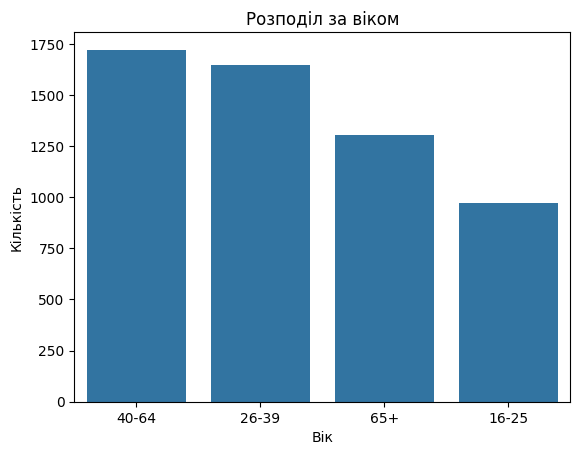

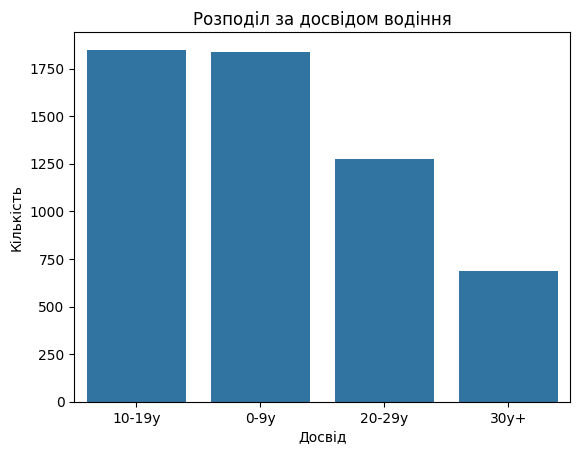

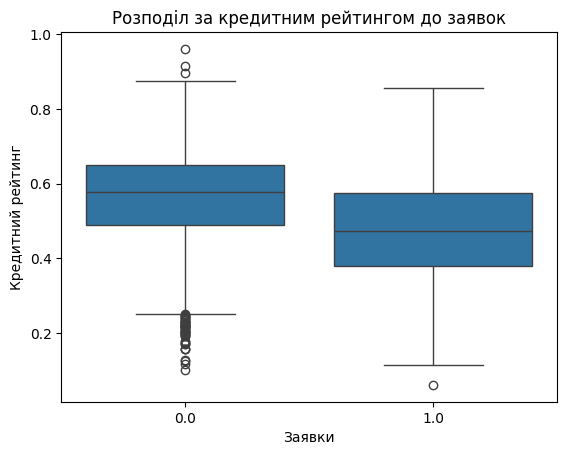

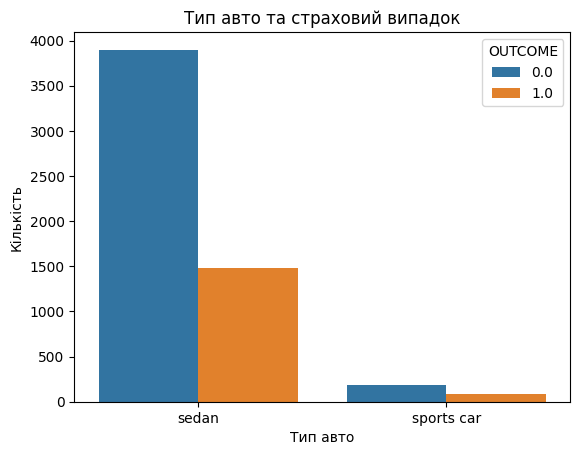

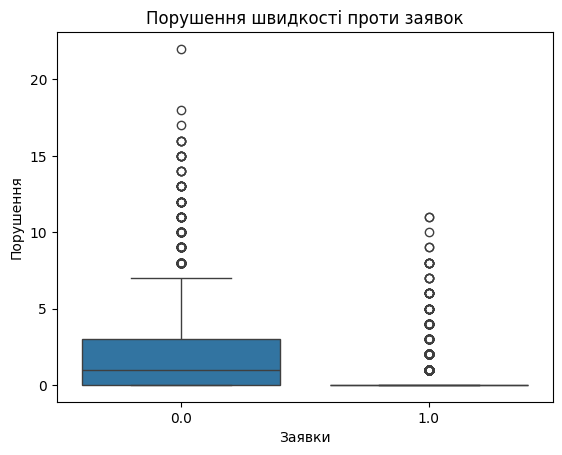

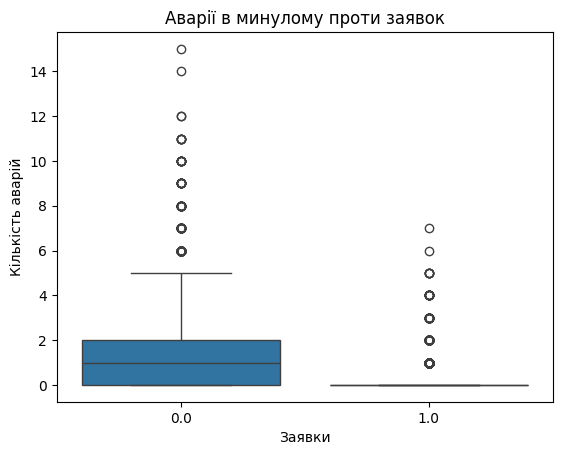

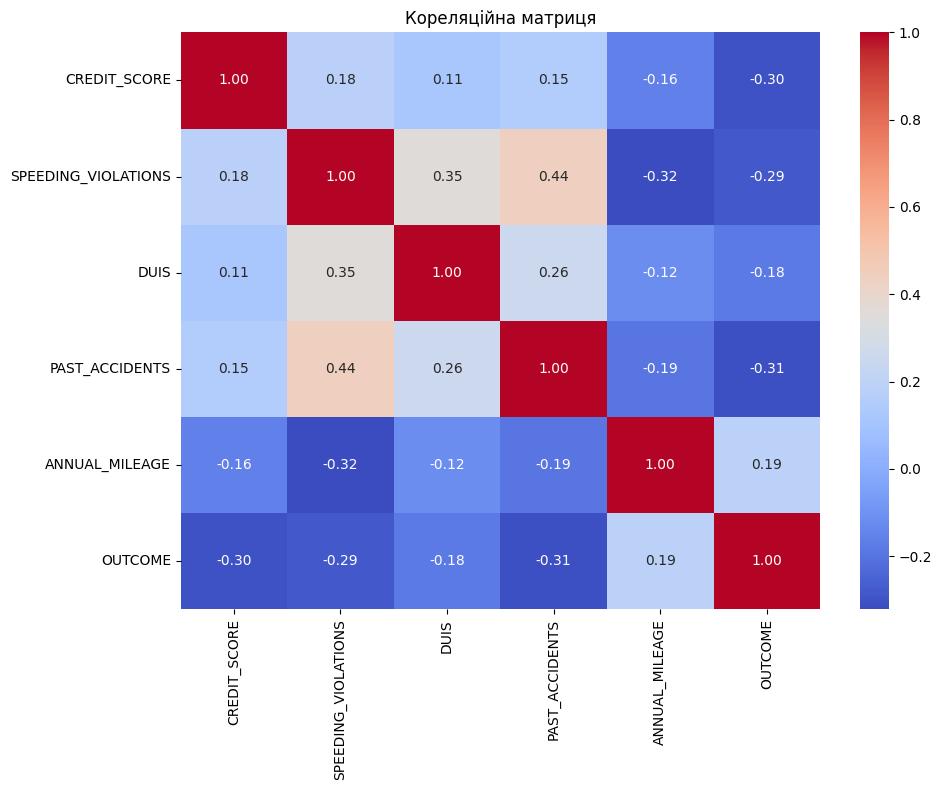

Висновок:
Кредитний рейтинг (CREDIT_SCORE)
Є найсильнішим негативним фактором: чим нижчий рейтинг, тим більша ймовірність страхового випадку. Це підтверджено кореляцією −0.30.

Історія минулих аварій (PAST_ACCIDENTS)
Має навіть сильнішу кореляцію з результатом −0.31. Клієнти з історією ДТП суттєво ризикованіші для компанії.

Поведінкові характеристики водія
Часті порушення швидкісного режиму (SPEEDING_VIOLATIONS) і водіння в нетверезому стані (DUIS) підвищують ризик.
Також помітна залежність між наявністю таких правопорушень і кількістю минулих аварій.

Вік та досвід водія
Клієнти віком 40–64 роки є найбільш чисельними.
Молодші водії з меншим досвідом частіше потрапляють у страхові ситуації (помітно за розподілом по категоріях AGE і DRIVING_EXPERIENCE).

Річний пробіг (ANNUAL_MILEAGE)
Має слабку, але позитивну кореляцію з OUTCOME (+0.18), тобто клієнти, які більше їздять, частіше подають заявки.

Тип автомобіля (VEHICLE_TYPE)
Різниця між комерційними і особистими авто помітна, але не є

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Car_Insurance_Claim.csv")
df_cleaned = df.copy()

# Очищення:
df_cleaned.drop(columns=['Unnamed: 0', 'ID', 'POSTAL_CODE'], inplace=True)
df_cleaned.replace(['none', 'None', 'N/A', 'NaN', 'unknown'], pd.NA, inplace=True)
numeric_columns = ['CREDIT_SCORE', 'SPEEDING_VIOLATIONS', 'DUIS',
                   'PAST_ACCIDENTS', 'ANNUAL_MILEAGE', 'OUTCOME']
for col in numeric_columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

df_cleaned.dropna(inplace=True)

# Описова статистика
desc_stats = df_cleaned.describe(include='all')
print("Описова статистика")
print(desc_stats)

# Візуалізації
# Розподіл за віком
plt.figure()
sns.countplot(data=df_cleaned, x='AGE', order=df_cleaned['AGE'].value_counts().index)
plt.title('Розподіл за віком')
plt.xlabel('Вік')
plt.ylabel('Кількість')
plt.show()

# Досвід водіння
plt.figure()
sns.countplot(data=df_cleaned, x='DRIVING_EXPERIENCE', order=df_cleaned['DRIVING_EXPERIENCE'].value_counts().index)
plt.title('Розподіл за досвідом водіння')
plt.xlabel('Досвід')
plt.ylabel('Кількість')
plt.show()

# Кредитний рейтинг залежно від результату
plt.figure()
sns.boxplot(data=df_cleaned, x='OUTCOME', y='CREDIT_SCORE')
plt.title('Розподіл за кредитним рейтингом до заявок')
plt.xlabel('Заявки')
plt.ylabel('Кредитний рейтинг')
plt.show()

# Тип авто та страховий випадок
plt.figure()
sns.countplot(data=df_cleaned, x='VEHICLE_TYPE', hue='OUTCOME')
plt.title('Тип авто та страховий випадок')
plt.xlabel('Тип авто')
plt.ylabel('Кількість')
plt.show()

# Порушення швидкості
plt.figure()
sns.boxplot(data=df_cleaned, x='OUTCOME', y='SPEEDING_VIOLATIONS')
plt.title('Порушення швидкості проти заявок')
plt.xlabel('Заявки')
plt.ylabel('Порушення')
plt.show()

# Аварії в минулому
plt.figure()
sns.boxplot(data=df_cleaned, x='OUTCOME', y='PAST_ACCIDENTS')
plt.title('Аварії в минулому проти заявок')
plt.xlabel('Заявки')
plt.ylabel('Кількість аварій')
plt.show()

# Теплова карта кореляції числових змінних
plt.figure(figsize=(10, 8))
corr = df_cleaned[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Кореляційна матриця')
plt.tight_layout()
plt.show()

# Висновок
print("""Висновок:
Кредитний рейтинг (CREDIT_SCORE)
Є найсильнішим негативним фактором: чим нижчий рейтинг, тим більша ймовірність страхового випадку. Це підтверджено кореляцією −0.30.

Історія минулих аварій (PAST_ACCIDENTS)
Має навіть сильнішу кореляцію з результатом −0.31. Клієнти з історією ДТП суттєво ризикованіші для компанії.

Поведінкові характеристики водія
Часті порушення швидкісного режиму (SPEEDING_VIOLATIONS) і водіння в нетверезому стані (DUIS) підвищують ризик.
Також помітна залежність між наявністю таких правопорушень і кількістю минулих аварій.

Вік та досвід водія
Клієнти віком 40–64 роки є найбільш чисельними.
Молодші водії з меншим досвідом частіше потрапляють у страхові ситуації (помітно за розподілом по категоріях AGE і DRIVING_EXPERIENCE).

Річний пробіг (ANNUAL_MILEAGE)
Має слабку, але позитивну кореляцію з OUTCOME (+0.18), тобто клієнти, які більше їздять, частіше подають заявки.

Тип автомобіля (VEHICLE_TYPE)
Різниця між комерційними і особистими авто помітна, але не є визначальною без глибшого аналізу в комбінації з іншими чинниками.
""")